# Visualization

For the visualization questions, the original file was uploaded to Gemini and asked for questions.

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [2]:
df = pd.read_csv('../data/processed/chocolate_sales.csv', parse_dates=['Date'])
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   3282 non-null   str           
 1   Country        3282 non-null   str           
 2   Product        3282 non-null   str           
 3   Date           3282 non-null   datetime64[us]
 4   Amount         3282 non-null   float64       
 5   Boxes Shipped  3282 non-null   int64         
dtypes: datetime64[us](1), float64(1), int64(1), str(3)
memory usage: 154.0 KB


---

## Sales Performance
1. What is the total profit accumulated during the period?
2. What is the average value per sale?
3. What is the total volume of boxes shipped?
4. Is there a correlation between the sales value (Value) and the quantity of boxes shipped?

### 1. What is the total profit accumulated during the period?

In [4]:
df['Month_Year'] = df['Date'].dt.to_period('M')
total_profit_by_month = df.groupby('Month_Year')['Amount'].sum().reset_index()
total_profit_by_month

,Month_Year,Amount
0,2022-01,896105.00
1,2022-02,699377.00
2,2022-03,749483.00
3,2022-04,674051.00
4,2022-05,752892.00
5,2022-06,865144.00
6,2022-07,803425.00
7,2022-08,743148.00
8,2023-01,958985.77
9,2023-02,749617.46


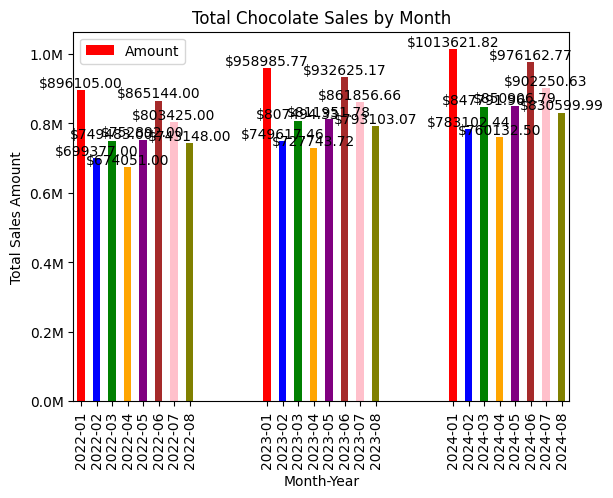

In [5]:
ax = total_profit_by_month.plot(
    x='Month_Year', 
    y='Amount', 
    kind='bar',
    color=['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'olive'], 
    title='Total Chocolate Sales by Month', 
    ylabel='Total Sales Amount', 
    xlabel='Month-Year'
)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

for container in ax.containers:
    ax.bar_label(container, fmt='$%.2f')


In [6]:
df['Year'] = df['Date'].dt.to_period('Y')
total_profit_by_year = df.groupby('Year')['Amount'].sum().reset_index()
total_profit_by_year

,Year,Amount
0,2022,6183625.00
1,2023,6643377.96
2,2024,6964568.90


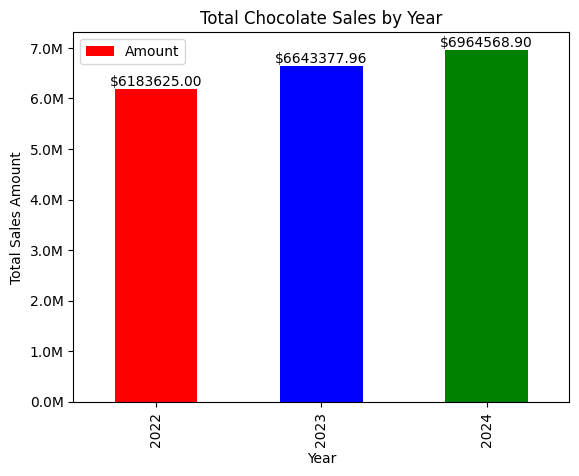

In [7]:
ax = total_profit_by_year.plot(
    x='Year', 
    y='Amount', 
    kind='bar',
    color=['red', 'blue', 'green'],
    title='Total Chocolate Sales by Year', 
    ylabel='Total Sales Amount', 
    xlabel='Year'
)

# Format y-axis labels to show amounts in millions
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

#add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='$%.2f')


### 2. What is the average value per sale?

In [8]:
avg_per_sale = df['Amount'].mean()
print(f'Average profit per sale: ${avg_per_sale:.2f}')

Average profit per sale: $6030.34


### 3. What is the total volume of boxes shipped?

In [ ]:
total_boxes_shipped = df['Boxes Shipped'].sum()
print(f'Total boxes shipped: {total_boxes_shipped}')

Total boxes shipped: 540437


### 4. Is there a correlation between the sales value (Value) and the quantity of boxes shipped?

In [10]:
correlation = df['Boxes Shipped'].corr(df['Amount'])
print(f'Correlation between Boxes Shipped and Amount: {correlation:.2f}')

Correlation between Boxes Shipped and Amount: -0.01


---

## Product Analysis
1. What are the 5 products that generate the most revenue?
2. Which product has the highest volume of boxes sold?
3. Is there any product that sells a lot in volume but generates little revenue (low unit value)?
4. What is the main product in each country?

### 1. What are the 5 products that generate the most revenue?

In [11]:
top_5_sales = df.groupby('Product')['Amount'].sum().nlargest(5)
top_5_sales

Product
Smooth Sliky Salty     1120201.09
50% Dark Bites         1087659.35
White Choc             1054257.00
Peanut Butter Cubes    1036591.09
Eclairs                 996947.96
Name: Amount, dtype: float64

### 2. Which product has the highest volume of boxes sold?

In [12]:
best_seller_by_boxes = df.groupby('Product')['Boxes Shipped'].sum().nlargest(1)
best_seller_by_boxes

Product
50% Dark Bites    29810
Name: Boxes Shipped, dtype: int64

### 3. Is there any product that sells a lot in volume but generates little revenue (low unit value)?

In [13]:
volume_revenue_by_product = df.groupby('Product').agg({
    'Boxes Shipped': 'sum',
    'Amount': 'sum'
})
volume_revenue_by_product['Price per Box'] = volume_revenue_by_product['Amount'] / volume_revenue_by_product['Boxes Shipped']
print(volume_revenue_by_product.sort_values(by='Boxes Shipped', ascending=False).round(2))

                      Boxes Shipped      Amount  Price per Box
Product                                                       
50% Dark Bites                29810  1087659.35          36.49
Smooth Sliky Salty            26969  1120201.09          41.54
Eclairs                       26678   996947.96          37.37
Spicy Special Slims           26662   938131.69          35.19
Caramel Stuffed Bars          26576   742516.15          27.94
Drinking Coco                 26402   822245.57          31.14
Milk Bars                     25436   866273.62          34.06
Peanut Butter Cubes           25339  1036591.09          40.91
White Choc                    25158  1054257.00          41.91
After Nines                   25156   837215.67          33.28
Mint Chip Choco               25149   904989.55          35.99
99% Dark & Pure               24818   960033.45          38.68
70% Dark Bites                24524   677346.22          27.62
85% Dark Bars                 23828   955268.24        

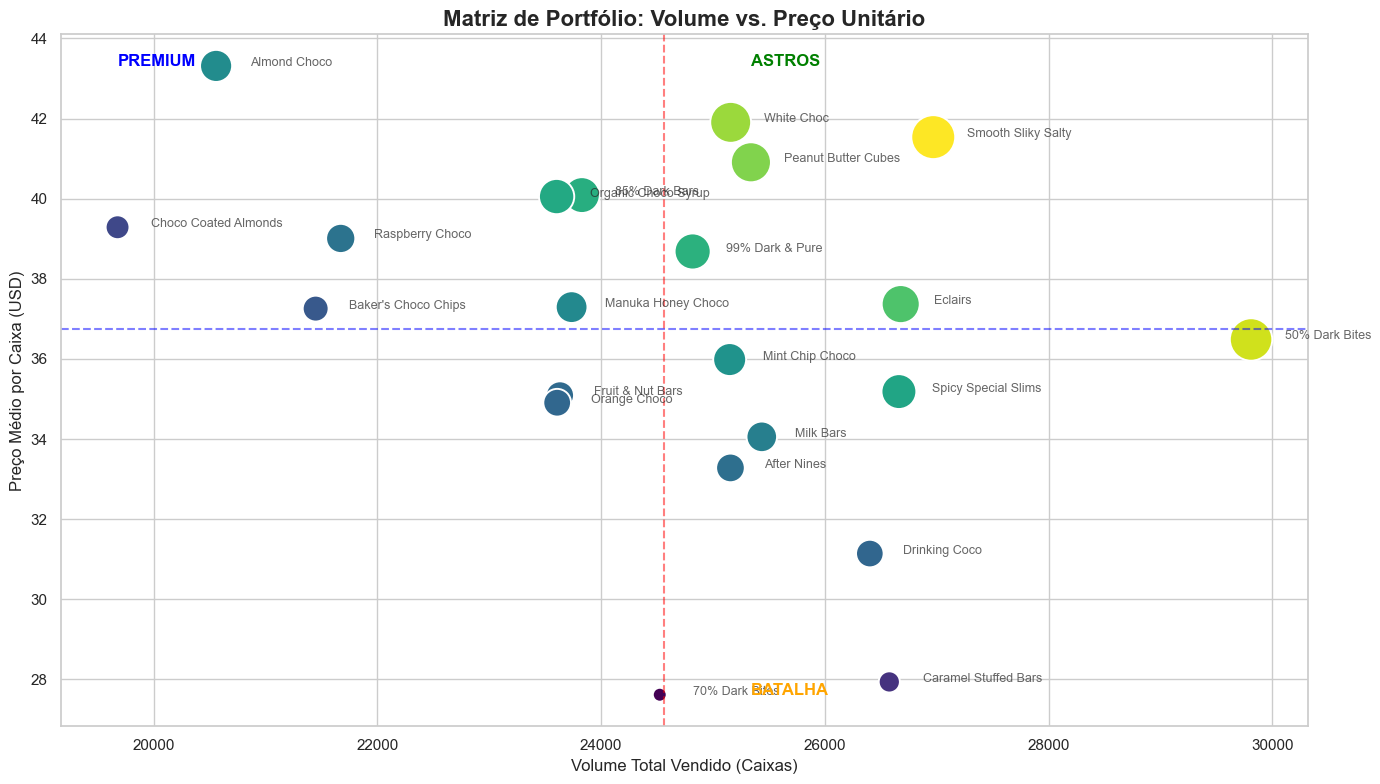

In [14]:
# Setup seaborn theme
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))

scatter = sns.scatterplot(
    data=volume_revenue_by_product,
    x='Boxes Shipped',
    y='Price per Box',  # Fixed: use correct column name
    size='Amount',       
    sizes=(100, 1000),  
    hue='Amount',       
    palette='viridis',
    legend=None         
)

for i in range(volume_revenue_by_product.shape[0]):
    plt.text(
        volume_revenue_by_product['Boxes Shipped'].iloc[i] + 300, # Adicionado .iloc
        volume_revenue_by_product['Price per Box'].iloc[i],       # Adicionado .iloc
        volume_revenue_by_product.index[i],
        fontsize=9,
        alpha=0.7
    )

avg_volume = volume_revenue_by_product['Boxes Shipped'].mean()
avg_price = volume_revenue_by_product['Price per Box'].mean()  # Fixed: use correct column name

plt.axvline(avg_volume, color='red', linestyle='--', alpha=0.5)
plt.axhline(avg_price, color='blue', linestyle='--', alpha=0.5)

# Titles and axes
plt.title('Matriz de Portfólio: Volume vs. Preço Unitário', fontsize=16, fontweight='bold')
plt.xlabel('Volume Total Vendido (Caixas)', fontsize=12)
plt.ylabel('Preço Médio por Caixa (USD)', fontsize=12)

# Add annotations in quadrants
plt.text(volume_revenue_by_product['Boxes Shipped'].max()*0.85, volume_revenue_by_product['Price per Box'].max(), 'ASTROS', color='green', fontweight='bold')
plt.text(volume_revenue_by_product['Boxes Shipped'].min(), volume_revenue_by_product['Price per Box'].max(), 'PREMIUM', color='blue', fontweight='bold')
plt.text(volume_revenue_by_product['Boxes Shipped'].max()*0.85, volume_revenue_by_product['Price per Box'].min(), 'BATALHA', color='orange', fontweight='bold')

plt.tight_layout()
plt.show()

### 4. What is the main product in each country?

In [21]:
main_product_by_country = df.groupby(['Country', 'Product'])['Amount'].sum().reset_index()
idx = main_product_by_country.groupby('Country')['Amount'].idxmax()
main_product_by_country = main_product_by_country.loc[idx].sort_values(by='Amount', ascending=False)
main_product_by_country_organized = main_product_by_country.reset_index(drop=True)
main_product_by_country_organized['Amount'] = main_product_by_country_organized['Amount'].apply(lambda x: f"$ {x:,.2f}")
main_product_by_country_organized


,Country,Product,Amount
0,Australia,50% Dark Bites,"$ 280,066.82"
1,New Zealand,Mint Chip Choco,"$ 277,979.25"
2,USA,Raspberry Choco,"$ 265,127.63"
3,India,Eclairs,"$ 252,107.54"
4,UK,Peanut Butter Cubes,"$ 252,099.20"
5,Canada,Smooth Sliky Salty,"$ 218,122.40"


---

## Geographical Analysis
1. Which country is the largest market in terms of revenue?
2. How is sales distributed among the 6 countries (Australia, UK, India, etc.)?
3. Which country has the highest average order value?

### 1. Which country is the largest market in terms of revenue?

In [30]:
market_by_country = df.groupby('Country')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)
market_by_country['Amount'] = market_by_country['Amount'].apply(lambda x: f"$ {x:,.2f}")
market_by_country.reset_index(drop=True).iloc[0]


Country         Australia
Amount     $ 3,646,444.35
Name: 0, dtype: str

### 2. How is sales distribuites among the 6 countries?

In [31]:
market_by_country.reset_index(drop=True)

,Country,Amount
0,Australia,"$ 3,646,444.35"
1,UK,"$ 3,365,388.90"
2,India,"$ 3,343,730.83"
3,USA,"$ 3,313,858.09"
4,Canada,"$ 3,078,495.65"
5,New Zealand,"$ 3,043,654.04"


### 3. Which country has the highest average order value?

In [37]:
avg_order_value_by_country = df.groupby('Country')['Amount'].mean().reset_index().sort_values(by='Amount', ascending=False)
avg_order_value_by_country['Amount'] = avg_order_value_by_country['Amount']
avg_order_value_by_country.reset_index(drop=True)

,Country,Amount
0,UK,6302.226404
1,USA,6171.057896
2,India,6057.483388
3,Australia,5929.177805
4,New Zealand,5864.458651
5,Canada,5863.801238


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'UK'),
  Text(1, 0, 'USA'),
  Text(2, 0, 'India'),
  Text(3, 0, 'Australia'),
  Text(4, 0, 'New Zealand'),
  Text(5, 0, 'Canada')])

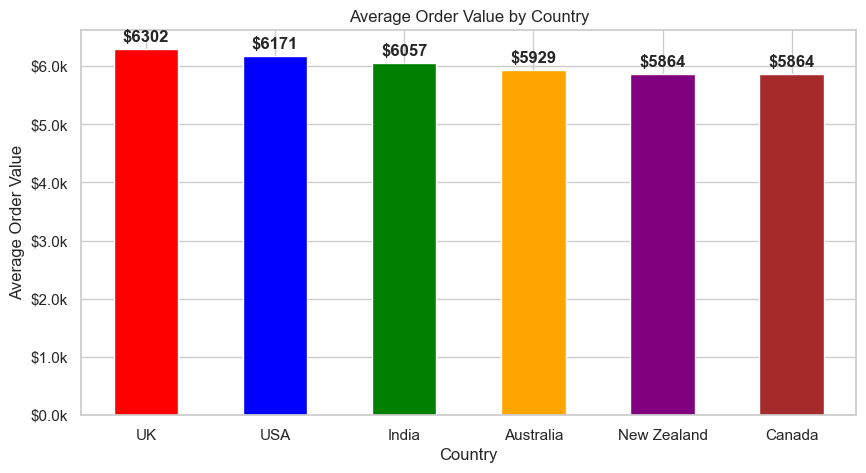

In [42]:
ax = avg_order_value_by_country.set_index('Country').plot(
    y='Amount',
    kind='bar',
    color=['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'olive'],
    title='Average Order Value by Country',
    ylabel='Average Order Value',
    xlabel='Country',
    figsize=(10, 5),
    legend=False
)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x/1e3:.1f}k'))

# add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='$%.0f', padding=3, fontweight='bold')

plt.xticks(rotation=0)

---

## Sales Team Performance
1. Who is the salesperson who generated the most revenue?
2. Who sold the largest number of boxes?
3. Which salesperson has the highest "average ticket" (average value per sale)?
4. Is there a salesperson who specializes in a specific product or dominates a specific country?

### 1. Who is the salesperson who generated the most revenue

In [61]:
most_revenue_by_sales_person = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False).reset_index()
most_revenue_by_sales_person['Amount'] = most_revenue_by_sales_person['Amount'].apply(lambda x: f"$ {x:,.2f}")
print(most_revenue_by_sales_person.head(1))

   Sales Person          Amount
0  Ches Bonnell  $ 1,022,599.96


### 2. Who sold the largest number of boxes?

In [55]:
boxes_sold = df.groupby('Sales Person')['Boxes Shipped'].sum().sort_values(ascending=False)
boxes_sold.head(1)

Sales Person
Karlen McCaffrey    29553
Name: Boxes Shipped, dtype: int64

### 3. Which salesperson has the highest "average ticket" (average value per sale)?

In [65]:
avg_ticket = df.groupby('Sales Person')['Amount'].mean().sort_values(ascending=False).reset_index()
avg_ticket['Amount'] = avg_ticket['Amount'].apply(lambda x: f"$ {x:,.2f}")
print(avg_ticket.head(1))

      Sales Person      Amount
0  Madelene Upcott  $ 7,481.69


### 4. Is there a salesperson who specializes in a specific product or dominates a specific country?

In [71]:
sales_by_country = df.groupby(['Country', 'Sales Person'])['Amount'].sum().reset_index()
total_by_country = df.groupby('Country')['Amount'].sum().reset_index().rename(columns={'Amount': 'Total Country'})
sales_by_country = sales_by_country.merge(total_by_country, on = 'Country')
sales_by_country['Market_Share_%'] = (sales_by_country['Amount']/sales_by_country['Total Country'])*100

leaders = sales_by_country.loc[sales_by_country.groupby('Country')['Market_Share_%'].idxmax()]
leaders

,Country,Sales Person,Amount,Total Country,Market_Share_%
18,Australia,Mallorie Waber,228112.72,3646444.35,6.255758
27,Canada,Beverie Moffet,231510.29,3078495.65,7.520241
55,India,Ches Bonnell,313021.88,3343730.83,9.361456
92,New Zealand,Madelene Upcott,215372.90,3043654.04,7.076129
117,UK,Madelene Upcott,227374.71,3365388.90,6.756268
141,USA,Kelci Walkden,222169.21,3313858.09,6.704246
